In [162]:
import numpy as np
import tensorflow as tf
from glob import glob as glob

from pureEM import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PM task ideas

- PMtask
    - first trial: net given PM cue, responds with PM action
    - subsequent trials: nback task

- WM architecture
    - pure LSTM
- WM+EM architecture
    - first trial, store M = {PMcue:cell_state} 
    - on each trial 
        - if sim(S_t,M)>threshold: reinstate 
        - else perform nback
        
- goals/questions
    - after hand crafted reinstatement, try graded reinstatement gate
        - gate = sim(S_t,M) 
        - gate = f(sim(s_t,M))


- todo 
    - investigate failure mode of pureWM architecture
    - try to mitigate failures with EM architecture


In [363]:
net = PMNet(30,num_og_tokens=3,seed=2)
task = NBackPMTask(nback=2,num_og_tokens=3,ntrials_pm=4)
trainer = Trainer(net,task)

randomizing pm embed
lstm2, in+out layers with do_


In [364]:
train_acc,train_cum_rands = trainer.train_closed_loop(100000,20,thresh=.99)

0.0 0.3 0
0.05 0.8 31
0.1 0.85 70
0.15 0.75 115
0.2 0.9 185
0.25 0.8 310
0.3 0.7 437
0.35 0.75 571
0.4 0.6 705
0.45 0.65 831
0.5 0.85 973
0.55 0.95 1123
0.6 0.8 1338
0.65 0.7 1686
0.7 0.9 2114
0.75 0.9 2736
0.8 0.55 3411
0.85 1.0 4216
0.9 0.9 5155
0.95 1.0 6183


(0, 1.02)

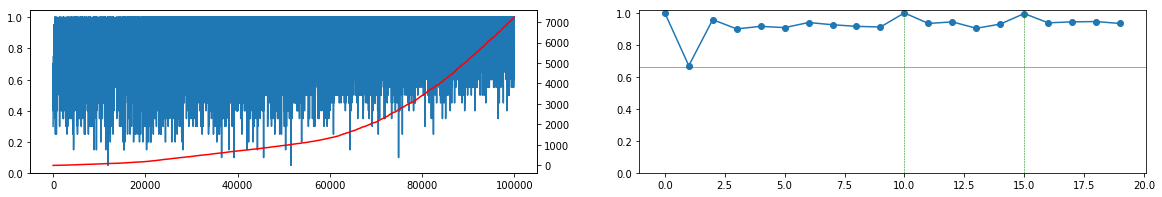

In [366]:
fig,axarr = plt.subplots(1,2,figsize=(20,3));axarr=axarr.reshape(-1)
# train
ax=axarr[0]
ax.plot(train_acc)
ax2 = ax.twinx()
ax2.plot(train_cum_rands,c='r')

# eval
eval_acc = trainer.eval_loop(500,ntrials=20).mean(0)
ax=axarr[1]
ax.plot(eval_acc)
ax.scatter(range(20),eval_acc)
for t in [10,15]:
  ax.axvline(t,c='g',lw=.5,ls='--')
ax.axhline(.66,c='r',lw=.5)
ax.set_ylim(0,1.02)

In [340]:
task = NBackPMTask(nback=2,num_og_tokens=3,ntrials_pm=0)
X,Y = task.gen_seq()

for x,y in zip(X.squeeze(),Y.squeeze()):
  print(x,y)

3 2
0 1
1 0
0 1
1 1
1 0
2 0
0 0
2 1
0 1
0 0
0 1
2 0
1 0
2 1
2 0
0 0
1 0
1 0
1 1
1 1
0 0
1 1
0 1
0 0
1 0
2 0
0 0
2 1
0 1


## older figs

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(train_acc)
for t in range(0,10000,100):
  plt.axvline(t,c='r',lw=.2)
plt.ylabel('accuracy')
plt.xlabel('training episode/epoch')
plt.title('LSTM20 training accuracy')
# plt.savefig('figures/nback+pm/training_acc-2back_2tokens')

In [ ]:
plt.figure(figsize=(13,4))
eps = 100
eval_acc = trainer.eval_loop(eps,25)
M = eval_acc.mean(0)
S = eval_acc.std(0)/np.sqrt(eps)
plt.plot(M,c='blue')
plt.fill_between(range(len(M)),M-S,M+S,alpha=.3)
plt.scatter(range(len(M)),M,c='blue')
for t in [10,15]:
  plt.axvline(t,c='g',lw=1)
plt.ylim(0,1.05)
plt.ylabel('mean acc')
plt.xlabel('trial')
plt.title('LSTM20 eval accuracy')
# plt.savefig('figures/nback+pm/eval_acc-2back_2tokens')

# from cluster

- stsize_arr=(10 20 30 40 50)
- ogtoken_arr=(2 3 4 5 10 15 20)
- pmtrial_arr=(1 2 3 4 5 10)
- nback 2,3,4

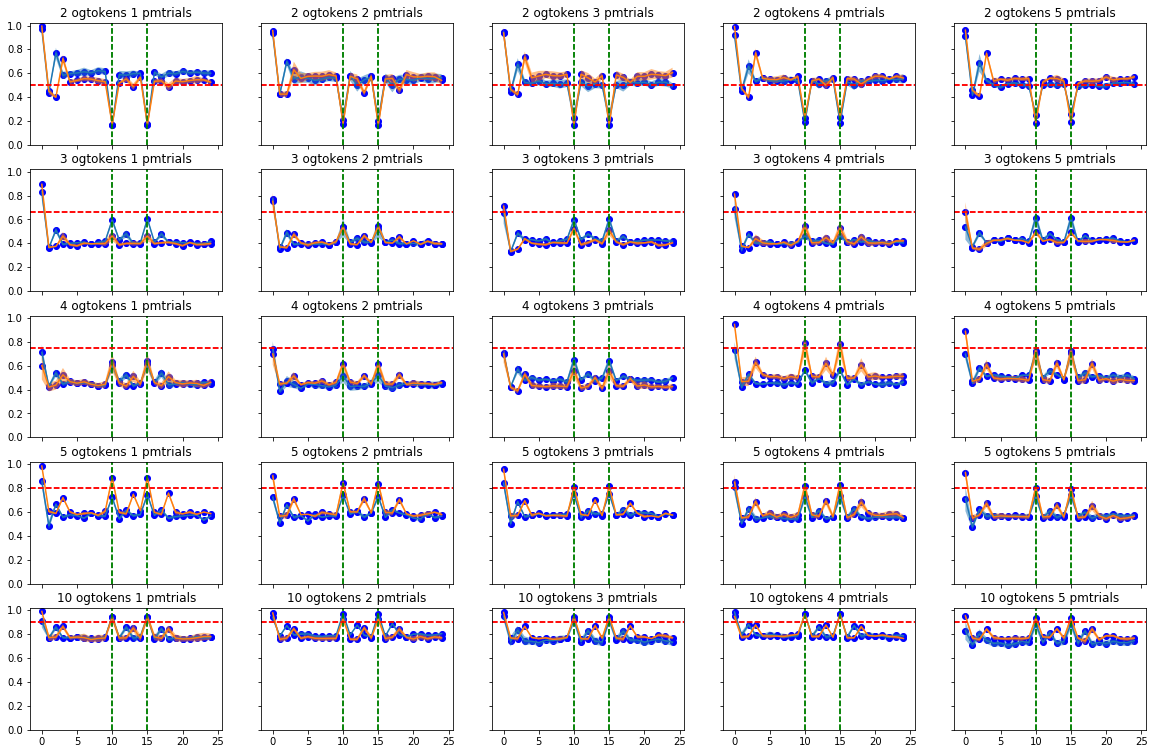

In [149]:
from itertools import product

stsize = 20
nback = 2
pmtrials = 1
ogtokens = 10

ogtokenL = [2,3,4,5,10]
pmtrialL = [1,2,3,4,5]
fig,axarr = plt.subplots(5,5,figsize=(20,13),sharex=True,sharey=True);axarr=axarr.reshape(-1)

for idx,(ogtokens,pmtrials) in enumerate(product(ogtokenL,pmtrialL)):
  ax = axarr[idx]
  ax.set_title("%i ogtokens %i pmtrials"%(ogtokens,pmtrials))
  for nback in [2,3]:
    nsubs = 4
    group_acc = -np.ones([nsubs,25])
    for seed in range(1,5):
      fpathL = glob("model_data/nback+pm/"+\
                    "lstm_%i-nback_%i-ogtokens_%i-pmtrials_%i-seed_%i-trepochs_10000-eval_acc.npy"%(
                      stsize,nback,ogtokens,pmtrials,seed))
      fpath = fpathL[0]
#       print(fpath)
      subj_acc = np.load(fpath).mean(0)
      group_acc[seed-1] = subj_acc

    M = group_acc.mean(0)
    S = group_acc.std(0)/np.sqrt(len(group_acc))

    ax.plot(M)
    ax.scatter(range(len(M)),M,c='b')
    ax.fill_between(range(len(M)),M-S,M+S,alpha=.5)

    ax.set_ylim(0,1.02)
    ax.axvline(10,c='g',ls='--')
    ax.axvline(15,c='g',ls='--')
    ax.axhline(1-(1/ogtokens),c='r',ls='--')

